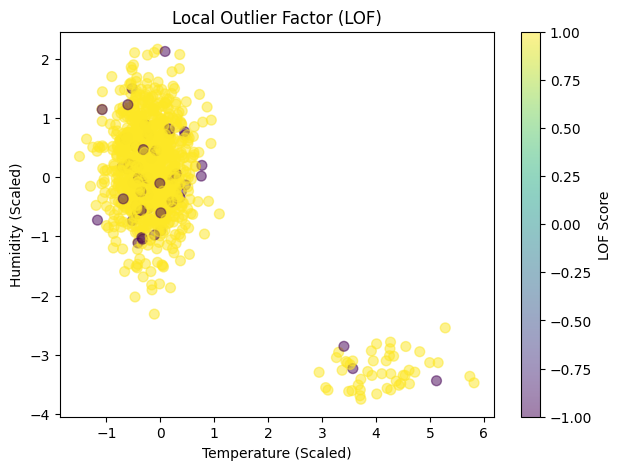

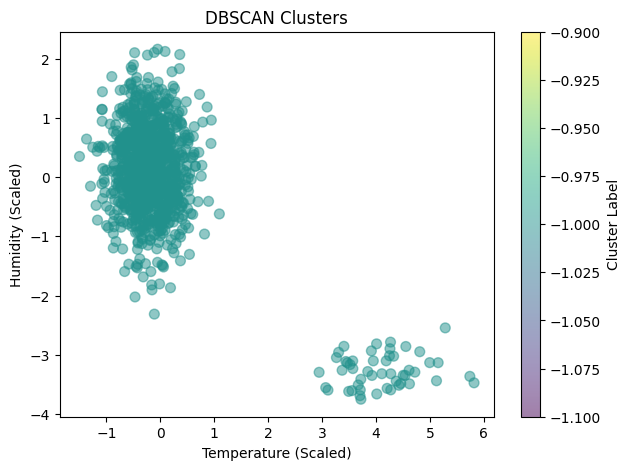

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset.csv")

# Scale the numerical features
scaler = StandardScaler()
df[['Temperature', 'Humidity']] = scaler.fit_transform(df[['Temperature', 'Humidity']])

# Encode 'Time' column to numerical representation
df['Time_seconds'] = df['Time'].apply(lambda x: pd.to_timedelta(x).total_seconds())

# Extract selected attributes
X = df[['Time_seconds', 'Temperature', 'Humidity']]

# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['LOF_Score'] = lof.fit_predict(X)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['DBSCAN_Labels'] = dbscan.fit_predict(X)

# Plot LOF scores
plt.figure(figsize=(7, 5))
plt.scatter(df['Temperature'], df['Humidity'], c=df['LOF_Score'], cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='LOF Score')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Temperature (Scaled)')
plt.ylabel('Humidity (Scaled)')
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(7, 5))
plt.scatter(df['Temperature'], df['Humidity'], c=df['DBSCAN_Labels'], cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('DBSCAN Clusters')
plt.xlabel('Temperature (Scaled)')
plt.ylabel('Humidity (Scaled)')
plt.show()



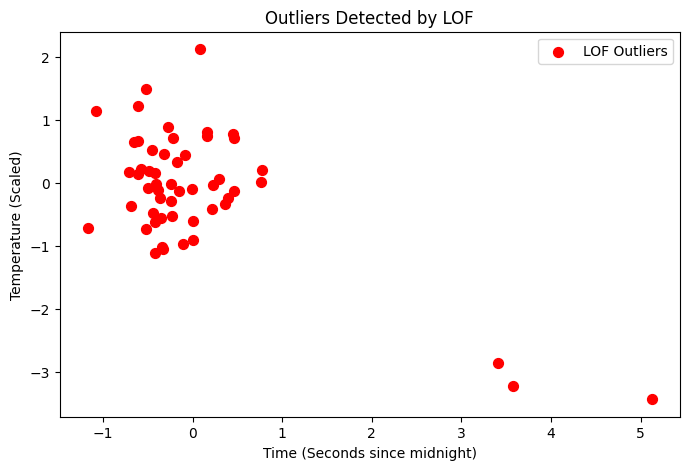

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(outliers_lof['Temperature'], outliers_lof['Humidity'], color='red', s=50, label='LOF Outliers')
plt.title('Outliers Detected by LOF')
plt.xlabel('Time (Seconds since midnight)')
plt.ylabel('Temperature (Scaled)')
plt.legend()
plt.show()


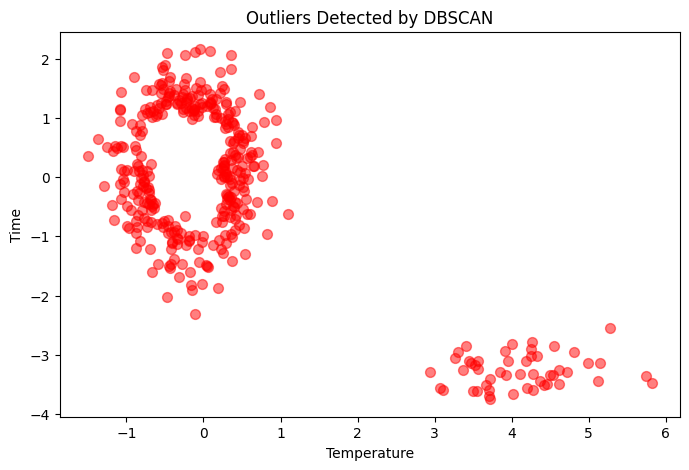

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(outliers['Temperature'], outliers['Humidity'], color='red', s=50, alpha=0.5)
plt.title('Outliers Detected by DBSCAN')
plt.xlabel('Temperature')
plt.ylabel('Time')
plt.show()


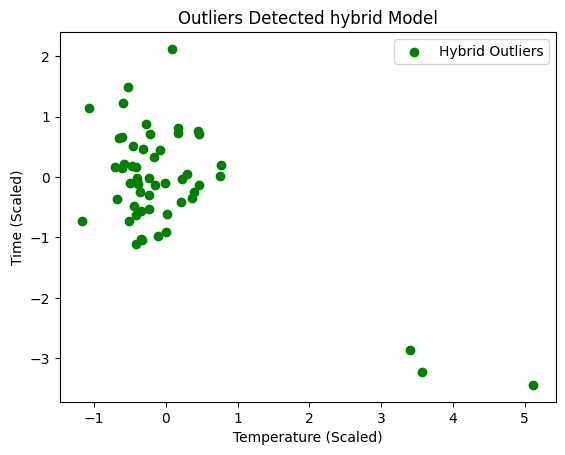

In [ ]:


df['Hybrid_Score'] = df['LOF_Score'] * (1 - df['DBSCAN_Labels'])

hybrid_outliers = df[df['Hybrid_Score'] < 0]
plt.scatter(hybrid_outliers['Temperature'], hybrid_outliers['Humidity'], color='green', label='Hybrid Outliers')

# Plot settings
plt.xlabel('Temperature (Scaled)')
plt.ylabel('Time (Scaled)')
plt.title('Outliers Detected hybrid Model')
plt.legend()
plt.show()